# Modifying our ELM to a compact representation

This is done for better understanding of the ELM structure and for easy experimentation purpose.

## Writing a class for ELM

In [21]:
import numpy as np
import pandas as pd

In [22]:
class ELM:
    
    def __init__(self,hidden_nodes,input_size):
        self.Hidden_Nodes = hidden_nodes
        self.Input_Size = input_size
        self.Input_Weights = None
        self.Input_Biases = None
        self.Output_Weights = None
        
    def relu(self,x):                            ## activation function
        return np.maximum(x, 0)
    
    def hidden_nodes(self,X):                    
        G = np.dot(X, self.Input_Weights)
        G = G + self.Input_Biases
        H = self.relu(G)
        return H
    
    def forward_pass(self,X):                   ## forward- propagation       
        out = self.hidden_nodes(X)
        out = np.dot(out, self.Output_Weights)
        return out
    
    def fit(self,X_train,y_train):
        self.Input_Weights = np.random.normal(size=[self.Input_Size,self.Hidden_Nodes])
        self.Input_Biases = np.random.normal(size=[self.Hidden_Nodes])
        self.Output_Weights = np.dot(np.linalg.pinv(self.hidden_nodes(X_train)), y_train)
        print("ELM Model Trained!!!!!") 
    
    def predict_score(self,X_test,y_test):
        prediction = self.forward_pass(X_test)
        correct = 0
        total = X_test.shape[0]
        for i in range(total):
            predicted = np.argmax(prediction[i])
            actual = np.argmax(y_test[i])
            correct += 1 if predicted == actual else 0
        accuracy = correct/total
        return accuracy

## Preparing our dataset

In [31]:
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = np.matrix(y_train).T
y_test = np.matrix(y_test).T

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

onehotencoder = OneHotEncoder(categories='auto')
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
y_train = onehotencoder.fit_transform(y_train).toarray()
X_test = scaler.fit_transform(X_test)
y_test = onehotencoder.fit_transform(y_test).toarray()

In [34]:
hidden_nodes = 50
input_size = X.shape[1]
elm = ELM(hidden_nodes,input_size)

In [35]:
elm.fit(X_train,y_train)

ELM Model Trained!!!!!


In [36]:
accuracy_score = elm.predict_score(X_test,y_test)
print('Accuracy for ', hidden_nodes, ' hidden nodes: ', accuracy_score)

Accuracy for  50  hidden nodes:  0.9722222222222222


## Checking the pattern in accuracy_score for varying number of hidden_nodes

In [37]:
print(input_size)

13


In [38]:
hidden_nodes = np.arange(10,1000,10)
print(hidden_nodes)

[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360
 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540
 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720
 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900
 910 920 930 940 950 960 970 980 990]


In [41]:
accuracy_list = []
for i in range (len(hidden_nodes)):
    elm = ELM(hidden_nodes[i],input_size)
    elm.fit(X_train,y_train)
    accuracy_score = elm.predict_score(X_test,y_test)
    accuracy_list.append(accuracy_score)

ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model T

## Plot to show the accuracy for varying number of Hidden Nodes  

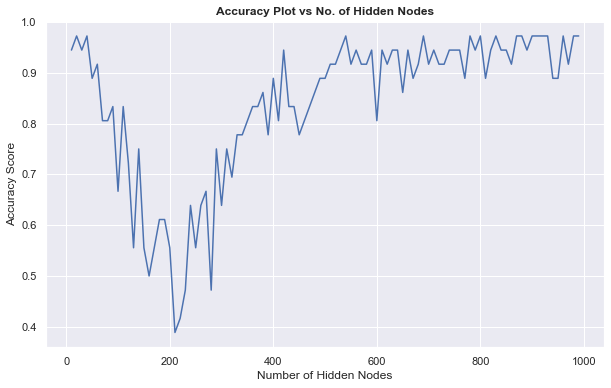

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(10,6))
plt.plot(hidden_nodes,accuracy_list)
plt.xlabel("Number of Hidden Nodes")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Plot vs No. of Hidden Nodes",fontweight="bold")
plt.show()

## Ensemble of ELMs 

To make the accuray_score more stable and robust we can set the number of hidden_nodes to a fixed number and experiment for a number of times given by the user and report the average accuracy score.

In [44]:
hidden_nodes = 700
input_size = X.shape[1]
n_exp = 10
accuracy_list = []
for i in range(n_exp):
    elm = ELM(hidden_nodes,input_size)
    elm.fit(X_train,y_train)
    accuracy_score = elm.predict_score(X_test,y_test)
    accuracy_list.append(accuracy_score)
avg_accuracy = np.mean(accuracy_list)
print("Average accuracy for ", n_exp," experiments",avg_accuracy)

ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
Average accuracy for  10  experiments 0.9361111111111111


In [49]:
hidden_nodes = 700
input_size = X.shape[1]
n_exp = np.arange(5,100,5)
avg_accuracy_list = []
accuracy_list = []
for j in range(len(n_exp)):
    for i in range(n_exp[j]):
        elm = ELM(hidden_nodes,input_size)
        elm.fit(X_train,y_train)
        accuracy_score = elm.predict_score(X_test,y_test)
        accuracy_list.append(accuracy_score)
    avg_accuracy = np.mean(accuracy_list)
    avg_accuracy_list.append(avg_accuracy)
    

Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!!
ELM Model Trained!!!!

## Plot to show the variation in average accuracy for varying number of exp.

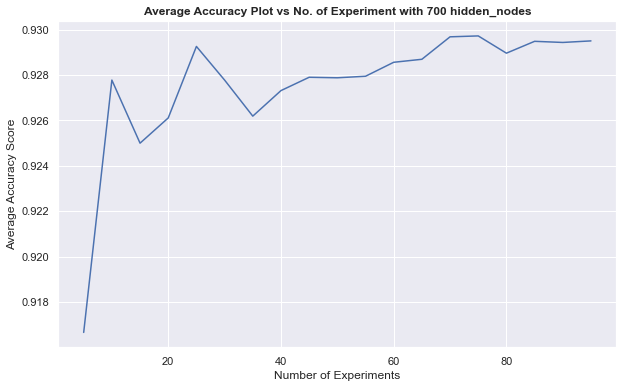

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(10,6))
plt.plot(n_exp,avg_accuracy_list)
plt.xlabel("Number of Experiments")
plt.ylabel("Average Accuracy Score")
title = f"Average Accuracy Plot vs No. of Experiment with {hidden_nodes} hidden_nodes"
plt.title(title,fontweight="bold")
plt.show()

## Experiments with changing the "Activation Function"

In [51]:
class ELM:
    
    def __init__(self,hidden_nodes,input_size,activation):
        self.Hidden_Nodes = hidden_nodes
        self.Input_Size = input_size
        self.Activation = activation
        self.Input_Weights = None
        self.Input_Biases = None
        self.Output_Weights = None
        
    def relu(self,x):
        return np.maximum(x, 0)
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def tanh(self,x):
        return np.tanh(x)
    
    def hidden_nodes(self,X):
        G = np.dot(X, self.Input_Weights)
        G = G + self.Input_Biases
        
        if self.Activation == "relu":
            H = self.relu(G)
        if self.Activation == "sigmoid":
            H = self.sigmoid(G)
        if self.Activation == "tanh":
            H = self.tanh(G)
            
        return H
    
    def forward_pass(self,X):
        out = self.hidden_nodes(X)
        out = np.dot(out, self.Output_Weights)
        return out
    
    def fit(self,X_train,y_train):
        self.Input_Weights = np.random.normal(size=[self.Input_Size,self.Hidden_Nodes])
        self.Input_Biases = np.random.normal(size=[self.Hidden_Nodes])
        self.Output_Weights = np.dot(np.linalg.pinv(self.hidden_nodes(X_train)), y_train)
        print("ELM Model Trained!!!!!") 
    
    def predict_score(self,X_test,y_test):
        prediction = self.forward_pass(X_test)
        correct = 0
        total = X_test.shape[0]
        for i in range(total):
            predicted = np.argmax(prediction[i])
            actual = np.argmax(y_test[i])
            correct += 1 if predicted == actual else 0
        accuracy = correct/total
        return accuracy

In [70]:
hidden_nodes = 700
input_size = X.shape[1]
activation = 'tanh'
elm = ELM(hidden_nodes,input_size,activation)

In [71]:
elm.fit(X_train,y_train)

ELM Model Trained!!!!!


In [72]:
accuracy_score = elm.predict_score(X_test,y_test)
print('Accuracy for ', hidden_nodes, ' hidden nodes: ', accuracy_score)

Accuracy for  700  hidden nodes:  0.9444444444444444
